<a href="https://colab.research.google.com/github/Moukthika1253/Facial_Expression_ImageClassifier/blob/main/facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf

<Axes: >

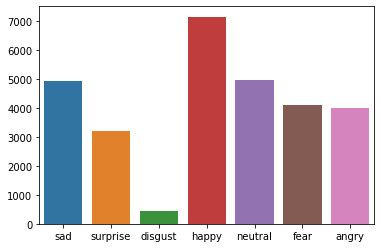

In [3]:
train_data="/content/images/train"
test_data="/content/images/validation"
train_count=[]
exp_list=[]
for emotion in os.listdir(train_data):
  exp_list.append(emotion)
  train_count.append(len(os.listdir(train_data+"/"+emotion)))
sns.barplot(x=exp_list,y=train_count)


<Axes: >

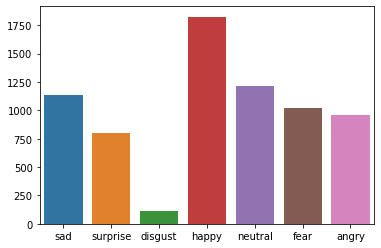

In [13]:
test_count=[]
for emotion in os.listdir(test_data):
  test_count.append(len(os.listdir(test_data+"/"+emotion)))
sns.barplot(x=exp_list,y=test_count)

**Face Expression images**

     sad            surprise            disgust            happy            neutral            fear            angry       

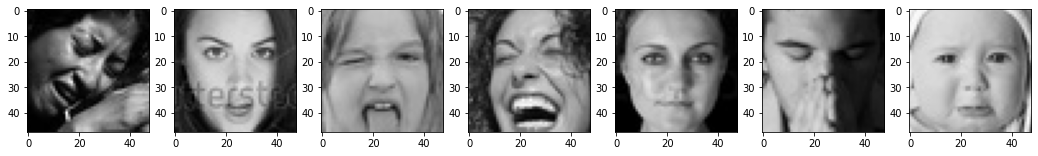

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
i=0
_, axes = plt.subplots(1, 7, figsize=(18, 16))
axes = axes.flatten()
for emotion,a in zip(os.listdir(train_data),axes):
   images=image.load_img(train_data+"/"+emotion+"/"+os.listdir(train_data+"/"+emotion)[0])
   print("     "+exp_list[i],end="       ")
   a.imshow(images,cmap="gray")
   i=i+1
plt.show()



# **Image Generator**

The directory must be set to the path where your ‘n’ classes of folders are present.
The target_size is the size of your input images, every image will be resized to this size.
color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
batch_size: No. of images to be yielded from the generator per batch.
class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image.

In [15]:
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator()
data_validation=ImageDataGenerator()
train_gen=data_train.flow_from_directory(train_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=True,seed=42)
validation_gen=data_validation.flow_from_directory(test_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building Convolutional Neural Networks (CNN)**

**Importing libraries to build CNN**

In [19]:
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D,Conv3D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import SGD,Adagrad,Adadelta,Adam
from keras.regularizers import l1,l2


**Model with 2 convolution layers and 2 fully connected layers optimizer=SGD activation = sigmoid**

In [20]:
model=Sequential()
#first convolution layer
model.add(Conv2D(32,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

#second convolution layer
model.add(Conv2D(64,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#2nd fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=SGD(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)       

In [26]:
train_time={}

**Training the model**

In [24]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)



Epoch 1/40
899/900 [============================>.] - ETA: 0s - loss: 2.0504 - accuracy: 0.2287

900/900 [==============================] - 19s 21ms/step - loss: 2.0504 - accuracy: 0.2288 - val_loss: 1.9004 - val_accuracy: 0.2989
Epoch 2/40
899/900 [============================>.] - ETA: 0s - loss: 1.9821 - accuracy: 0.2528

900/900 [==============================] - 17s 18ms/step - loss: 1.9820 - accuracy: 0.2528 - val_loss: 1.8669 - val_accuracy: 0.3249
Epoch 3/40
898/900 [============================>.] - ETA: 0s - loss: 1.9467 - accuracy: 0.2692

900/900 [==============================] - 16s 18ms/step - loss: 1.9468 - accuracy: 0.2693 - val_loss: 1.8360 - val_accuracy: 0.3278
Epoch 4/40
897/900 [============================>.] - ETA: 0s - loss: 1.9201 - accuracy: 0.2874

900/900 [==============================] - 16s 17ms/step - loss: 1.9203 - accuracy: 0.2875 - val_loss: 1.8161 - val_accuracy: 0.3507
Epoch 5/40
900/900 [==============================] - ETA: 0s - loss: 1.9033 - accuracy: 0.2979

900/900 [==============================] - 16s 18ms/step - loss: 1.9033 - accuracy: 0.2979 - val_loss: 1.8000 - val_accuracy: 0.3507
Epoch 6/40
898/900 [============================>.] - ETA: 0s - loss: 1.8849 - accuracy: 0.3052

900/900 [==============================] - 16s 18ms/step - loss: 1.8849 - accuracy: 0.3053 - val_loss: 1.7864 - val_accuracy: 0.3558
Epoch 7/40
897/900 [============================>.] - ETA: 0s - loss: 1.8692 - accuracy: 0.3162

900/900 [==============================] - 16s 18ms/step - loss: 1.8691 - accuracy: 0.3163 - val_loss: 1.7593 - val_accuracy: 0.3790
Epoch 8/40
897/900 [============================>.] - ETA: 0s - loss: 1.8490 - accuracy: 0.3298

900/900 [==============================] - 16s 18ms/step - loss: 1.8490 - accuracy: 0.3296 - val_loss: 1.7711 - val_accuracy: 0.3827
Epoch 9/40
897/900 [============================>.] - ETA: 0s - loss: 1.8435 - accuracy: 0.3309

900/900 [==============================] - 16s 18ms/step - loss: 1.8430 - accuracy: 0.3312 - val_loss: 1.8039 - val_accuracy: 0.3685
Epoch 10/40
899/900 [============================>.] - ETA: 0s - loss: 1.8299 - accuracy: 0.3416

900/900 [==============================] - 16s 18ms/step - loss: 1.8301 - accuracy: 0.3416 - val_loss: 1.7341 - val_accuracy: 0.3732
Epoch 11/40
897/900 [============================>.] - ETA: 0s - loss: 1.8158 - accuracy: 0.3478

900/900 [==============================] - 16s 18ms/step - loss: 1.8163 - accuracy: 0.3476 - val_loss: 1.7378 - val_accuracy: 0.3895
Epoch 12/40
898/900 [============================>.] - ETA: 0s - loss: 1.8081 - accuracy: 0.3496

900/900 [==============================] - 17s 19ms/step - loss: 1.8077 - accuracy: 0.3498 - val_loss: 1.7455 - val_accuracy: 0.3757
Epoch 13/40
900/900 [==============================] - ETA: 0s - loss: 1.7993 - accuracy: 0.3537

900/900 [==============================] - 16s 17ms/step - loss: 1.7993 - accuracy: 0.3537 - val_loss: 1.7110 - val_accuracy: 0.3963
Epoch 14/40
899/900 [============================>.] - ETA: 0s - loss: 1.7892 - accuracy: 0.3573

900/900 [==============================] - 19s 21ms/step - loss: 1.7892 - accuracy: 0.3573 - val_loss: 1.6844 - val_accuracy: 0.4000
Epoch 15/40
899/900 [============================>.] - ETA: 0s - loss: 1.7777 - accuracy: 0.3657

900/900 [==============================] - 16s 18ms/step - loss: 1.7775 - accuracy: 0.3658 - val_loss: 1.6755 - val_accuracy: 0.4074
Epoch 16/40
900/900 [==============================] - ETA: 0s - loss: 1.7727 - accuracy: 0.3668

900/900 [==============================] - 16s 18ms/step - loss: 1.7727 - accuracy: 0.3668 - val_loss: 1.6797 - val_accuracy: 0.4000
Epoch 17/40
900/900 [==============================] - ETA: 0s - loss: 1.7697 - accuracy: 0.3646

900/900 [==============================] - 17s 18ms/step - loss: 1.7697 - accuracy: 0.3646 - val_loss: 1.6707 - val_accuracy: 0.4146
Epoch 18/40
900/900 [==============================] - ETA: 0s - loss: 1.7630 - accuracy: 0.3666

900/900 [==============================] - 16s 18ms/step - loss: 1.7630 - accuracy: 0.3666 - val_loss: 1.6719 - val_accuracy: 0.4080
Epoch 19/40
898/900 [============================>.] - ETA: 0s - loss: 1.7501 - accuracy: 0.3726

900/900 [==============================] - 19s 21ms/step - loss: 1.7503 - accuracy: 0.3724 - val_loss: 1.6496 - val_accuracy: 0.4138
Epoch 20/40
899/900 [============================>.] - ETA: 0s - loss: 1.7464 - accuracy: 0.3768

900/900 [==============================] - 16s 18ms/step - loss: 1.7463 - accuracy: 0.3768 - val_loss: 1.7894 - val_accuracy: 0.3784
Epoch 21/40
898/900 [============================>.] - ETA: 0s - loss: 1.7367 - accuracy: 0.3805

900/900 [==============================] - 16s 18ms/step - loss: 1.7365 - accuracy: 0.3805 - val_loss: 1.7050 - val_accuracy: 0.4121
Epoch 22/40
897/900 [============================>.] - ETA: 0s - loss: 1.7287 - accuracy: 0.3827

900/900 [==============================] - 16s 17ms/step - loss: 1.7284 - accuracy: 0.3829 - val_loss: 1.6855 - val_accuracy: 0.4101
Epoch 23/40
897/900 [============================>.] - ETA: 0s - loss: 1.7240 - accuracy: 0.3872

900/900 [==============================] - 16s 18ms/step - loss: 1.7245 - accuracy: 0.3870 - val_loss: 1.6808 - val_accuracy: 0.4088
Epoch 24/40
900/900 [==============================] - ETA: 0s - loss: 1.7185 - accuracy: 0.3864

900/900 [==============================] - 16s 17ms/step - loss: 1.7185 - accuracy: 0.3864 - val_loss: 1.6269 - val_accuracy: 0.4200
Epoch 25/40
898/900 [============================>.] - ETA: 0s - loss: 1.7121 - accuracy: 0.3892

900/900 [==============================] - 17s 19ms/step - loss: 1.7122 - accuracy: 0.3893 - val_loss: 1.7093 - val_accuracy: 0.3901
Epoch 26/40
897/900 [============================>.] - ETA: 0s - loss: 1.7038 - accuracy: 0.3915

900/900 [==============================] - 16s 18ms/step - loss: 1.7037 - accuracy: 0.3915 - val_loss: 1.6035 - val_accuracy: 0.4345
Epoch 27/40
899/900 [============================>.] - ETA: 0s - loss: 1.6961 - accuracy: 0.3954

900/900 [==============================] - 16s 18ms/step - loss: 1.6963 - accuracy: 0.3955 - val_loss: 1.6731 - val_accuracy: 0.4187
Epoch 28/40
899/900 [============================>.] - ETA: 0s - loss: 1.6946 - accuracy: 0.3980

900/900 [==============================] - 16s 18ms/step - loss: 1.6948 - accuracy: 0.3979 - val_loss: 1.6196 - val_accuracy: 0.4281
Epoch 29/40
899/900 [============================>.] - ETA: 0s - loss: 1.6933 - accuracy: 0.3977

900/900 [==============================] - 17s 19ms/step - loss: 1.6936 - accuracy: 0.3976 - val_loss: 1.5936 - val_accuracy: 0.4392
Epoch 30/40
900/900 [==============================] - ETA: 0s - loss: 1.6857 - accuracy: 0.3988

900/900 [==============================] - 16s 18ms/step - loss: 1.6857 - accuracy: 0.3988 - val_loss: 1.5792 - val_accuracy: 0.4477
Epoch 31/40
898/900 [============================>.] - ETA: 0s - loss: 1.6809 - accuracy: 0.4008

900/900 [==============================] - 17s 18ms/step - loss: 1.6809 - accuracy: 0.4010 - val_loss: 1.6080 - val_accuracy: 0.4277
Epoch 32/40
898/900 [============================>.] - ETA: 0s - loss: 1.6798 - accuracy: 0.3997

900/900 [==============================] - 16s 17ms/step - loss: 1.6798 - accuracy: 0.3996 - val_loss: 1.5790 - val_accuracy: 0.4372
Epoch 33/40
897/900 [============================>.] - ETA: 0s - loss: 1.6697 - accuracy: 0.4089

900/900 [==============================] - 16s 18ms/step - loss: 1.6693 - accuracy: 0.4088 - val_loss: 1.5840 - val_accuracy: 0.4457
Epoch 34/40
898/900 [============================>.] - ETA: 0s - loss: 1.6634 - accuracy: 0.4101

900/900 [==============================] - 16s 18ms/step - loss: 1.6634 - accuracy: 0.4101 - val_loss: 1.5679 - val_accuracy: 0.4456
Epoch 35/40
897/900 [============================>.] - ETA: 0s - loss: 1.6592 - accuracy: 0.4138

900/900 [==============================] - 16s 18ms/step - loss: 1.6590 - accuracy: 0.4138 - val_loss: 1.5694 - val_accuracy: 0.4426
Epoch 36/40
900/900 [==============================] - ETA: 0s - loss: 1.6466 - accuracy: 0.4195

900/900 [==============================] - 17s 18ms/step - loss: 1.6466 - accuracy: 0.4195 - val_loss: 1.6995 - val_accuracy: 0.4143
Epoch 37/40
898/900 [============================>.] - ETA: 0s - loss: 1.6450 - accuracy: 0.4153

900/900 [==============================] - 16s 17ms/step - loss: 1.6448 - accuracy: 0.4154 - val_loss: 1.5572 - val_accuracy: 0.4510
Epoch 38/40
899/900 [============================>.] - ETA: 0s - loss: 1.6390 - accuracy: 0.4199

900/900 [==============================] - 16s 18ms/step - loss: 1.6390 - accuracy: 0.4200 - val_loss: 1.5627 - val_accuracy: 0.4445
Epoch 39/40
898/900 [============================>.] - ETA: 0s - loss: 1.6300 - accuracy: 0.4219

900/900 [==============================] - 16s 18ms/step - loss: 1.6296 - accuracy: 0.4219 - val_loss: 1.5367 - val_accuracy: 0.4638
Epoch 40/40
900/900 [==============================] - ETA: 0s - loss: 1.6247 - accuracy: 0.4254

900/900 [==============================] - 16s 17ms/step - loss: 1.6247 - accuracy: 0.4254 - val_loss: 1.6395 - val_accuracy: 0.4210
CPU times: user 12min 53s, sys: 1min 5s, total: 13min 59s
Wall time: 12min 19s


In [27]:
train_time['SGD']=12.19

In [29]:
model_json_SGD = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json_SGD)

**Performance using SGD optimizer and Sigmoid activation function**

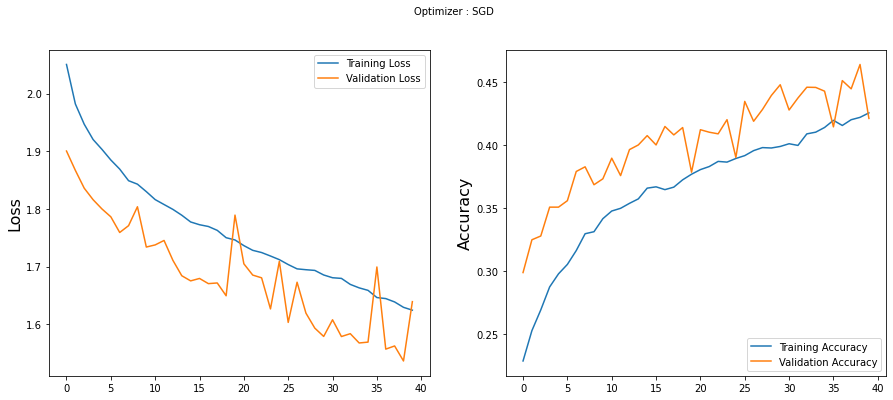

In [38]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 4 convolutional layers, 3 hidden layers optimizer=Adagrad activation=Relu**

In [41]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#second convolution layer
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#third convolution layer
model.add(Conv2D(256,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#fourth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(256,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))


#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adagrad(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])
